Name - Devanshu
     Roll No- 56
     Registration Number - 12410207

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

df1= pd.read_csv("accounts.csv")
df2= pd.read_csv("data_dictionary.csv")
df3= pd.read_csv("products.csv")
df4= pd.read_csv("sales_pipeline.csv")
df5= pd.read_csv("sales_teams.csv")

df3.head()

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [28]:
df6=pd.merge(df1,df4 )
df7=pd.merge(df6,df3)
df8=pd.merge(df7,df5)
df=pd.merge(df8,df4)
df

,account,sector,year_established,revenue,employees,office_location,subsidiary_of,opportunity_id,sales_agent,product,deal_stage,engage_date,close_date,close_value,series,sales_price,manager,regional_office
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,N4SD17JR,Reed Clapper,GTX Basic,Won,2016-11-12,2017-03-01,556.0,GTX,550,Rocco Neubert,East
1,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,TBZMXKH4,Wilburn Farren,MG Advanced,Won,2017-01-15,2017-03-29,3833.0,MG,3393,Cara Losch,East
2,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,S3W6Q07M,Kami Bicknell,GTX Plus Pro,Engaging,2017-01-16,NaN,NaN,GTX,5482,Summer Sewald,West
3,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,V4324HG4,Violet Mclelland,MG Special,Lost,2017-01-23,2017-05-06,0.0,MG,55,Cara Losch,East
4,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN,CZ3XOD03,Boris Faz,GTX Plus Pro,Won,2017-01-29,2017-05-11,5772.0,GTX,5482,Rocco Neubert,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,Zumgoity,medical,1984,441.08,1210,United States,NaN,AADN7F5T,Darcel Schlecht,MG Special,Lost,2017-10-12,2017-10-17,0.0,MG,55,Melvin Marxen,Central
6113,Zumgoity,medical,1984,441.08,1210,United States,NaN,03X37HOO,Darcel Schlecht,MG Special,Lost,2017-10-16,2017-10-17,0.0,MG,55,Melvin Marxen,Central
6114,Zumgoity,medical,1984,441.08,1210,United States,NaN,1PXQZ40I,Versie Hillebrand,MG Advanced,Won,2017-12-13,2017-12-27,3735.0,MG,3393,Dustin Brinkmann,Central
6115,Zumgoity,medical,1984,441.08,1210,United States,NaN,YL29KX3L,Anna Snelling,GTX Plus Basic,Prospecting,NaN,NaN,NaN,GTX,1096,Dustin Brinkmann,Central


In [29]:
df.dtypes

account              object
sector               object
year_established      int64
revenue             float64
employees             int64
office_location      object
subsidiary_of        object
opportunity_id       object
sales_agent          object
product              object
deal_stage           object
engage_date          object
close_date           object
close_value         float64
series               object
sales_price           int64
manager              object
regional_office      object
dtype: object

In [30]:
df['engage_date']=df['engage_date'].fillna(df['engage_date'].mode()[0])
df['engage_date']=pd.to_datetime(df['engage_date'])

df['close_date']=df['close_date'].fillna(df['close_date'].mode()[0])
df['close_date']=pd.to_datetime(df['close_date'])

df['year_established']=pd.to_datetime(df['year_established'])

dev=pd.DataFrame(df.groupby("sales_agent")["revenue"].sum()).reset_index().sort_values("revenue",ascending=False)
dev

,sales_agent,revenue
26,Vicki Laflamme,932236.87
15,Kary Hendrixson,855578.41
0,Anna Snelling,776091.45
14,Kami Bicknell,724775.96
17,Markita Hansen,636848.20
19,Maureen Marcano,630663.44
29,Zane Levy,612370.94
6,Darcel Schlecht,576633.18
4,Corliss Cosme,569695.77
25,Versie Hillebrand,560647.45


([<matplotlib.axis.XTick at 0x15a02d610>,
 [Text(0.0, 0, 'Vicki Laflamme'),
  Text(1.0, 0, 'Kary Hendrixson'),
  Text(2.0, 0, 'Anna Snelling'),
  Text(3.0, 0, 'Kami Bicknell'),
  Text(4.0, 0, 'Markita Hansen'),
  Text(5.0, 0, 'Maureen Marcano'),
  Text(6.0, 0, 'Zane Levy'),
  Text(7.0, 0, 'Darcel Schlecht'),
  Text(8.0, 0, 'Corliss Cosme'),
  Text(9.0, 0, 'Versie Hillebrand'),
  Text(10.0, 0, 'Lajuana Vencill'),
  Text(11.0, 0, 'Jonathan Berthelot'),
  Text(12.0, 0, 'James Ascencio'),
  Text(13.0, 0, 'Cassey Cress'),
  Text(14.0, 0, 'Donn Cantrell'),
  Text(15.0, 0, 'Reed Clapper'),
  Text(16.0, 0, 'Violet Mclelland'),
  Text(17.0, 0, 'Hayden Neloms'),
  Text(18.0, 0, 'Gladys Colclough'),
  Text(19.0, 0, 'Niesha Huffines'),
  Text(20.0, 0, 'Moses Frase'),
  Text(21.0, 0, 'Marty Freudenburg'),
  Text(22.0, 0, 'Boris Faz'),
  Text(23.0, 0, 'Daniell Hammack'),
  Text(24.0, 0, 'Cecily Lampkin'),
  Text(25.0, 0, 'Elease Gluck'),
  Text(26.0, 0, 'Rosie Papadopoulos'),
  Text(27.0, 0, 'Rosali

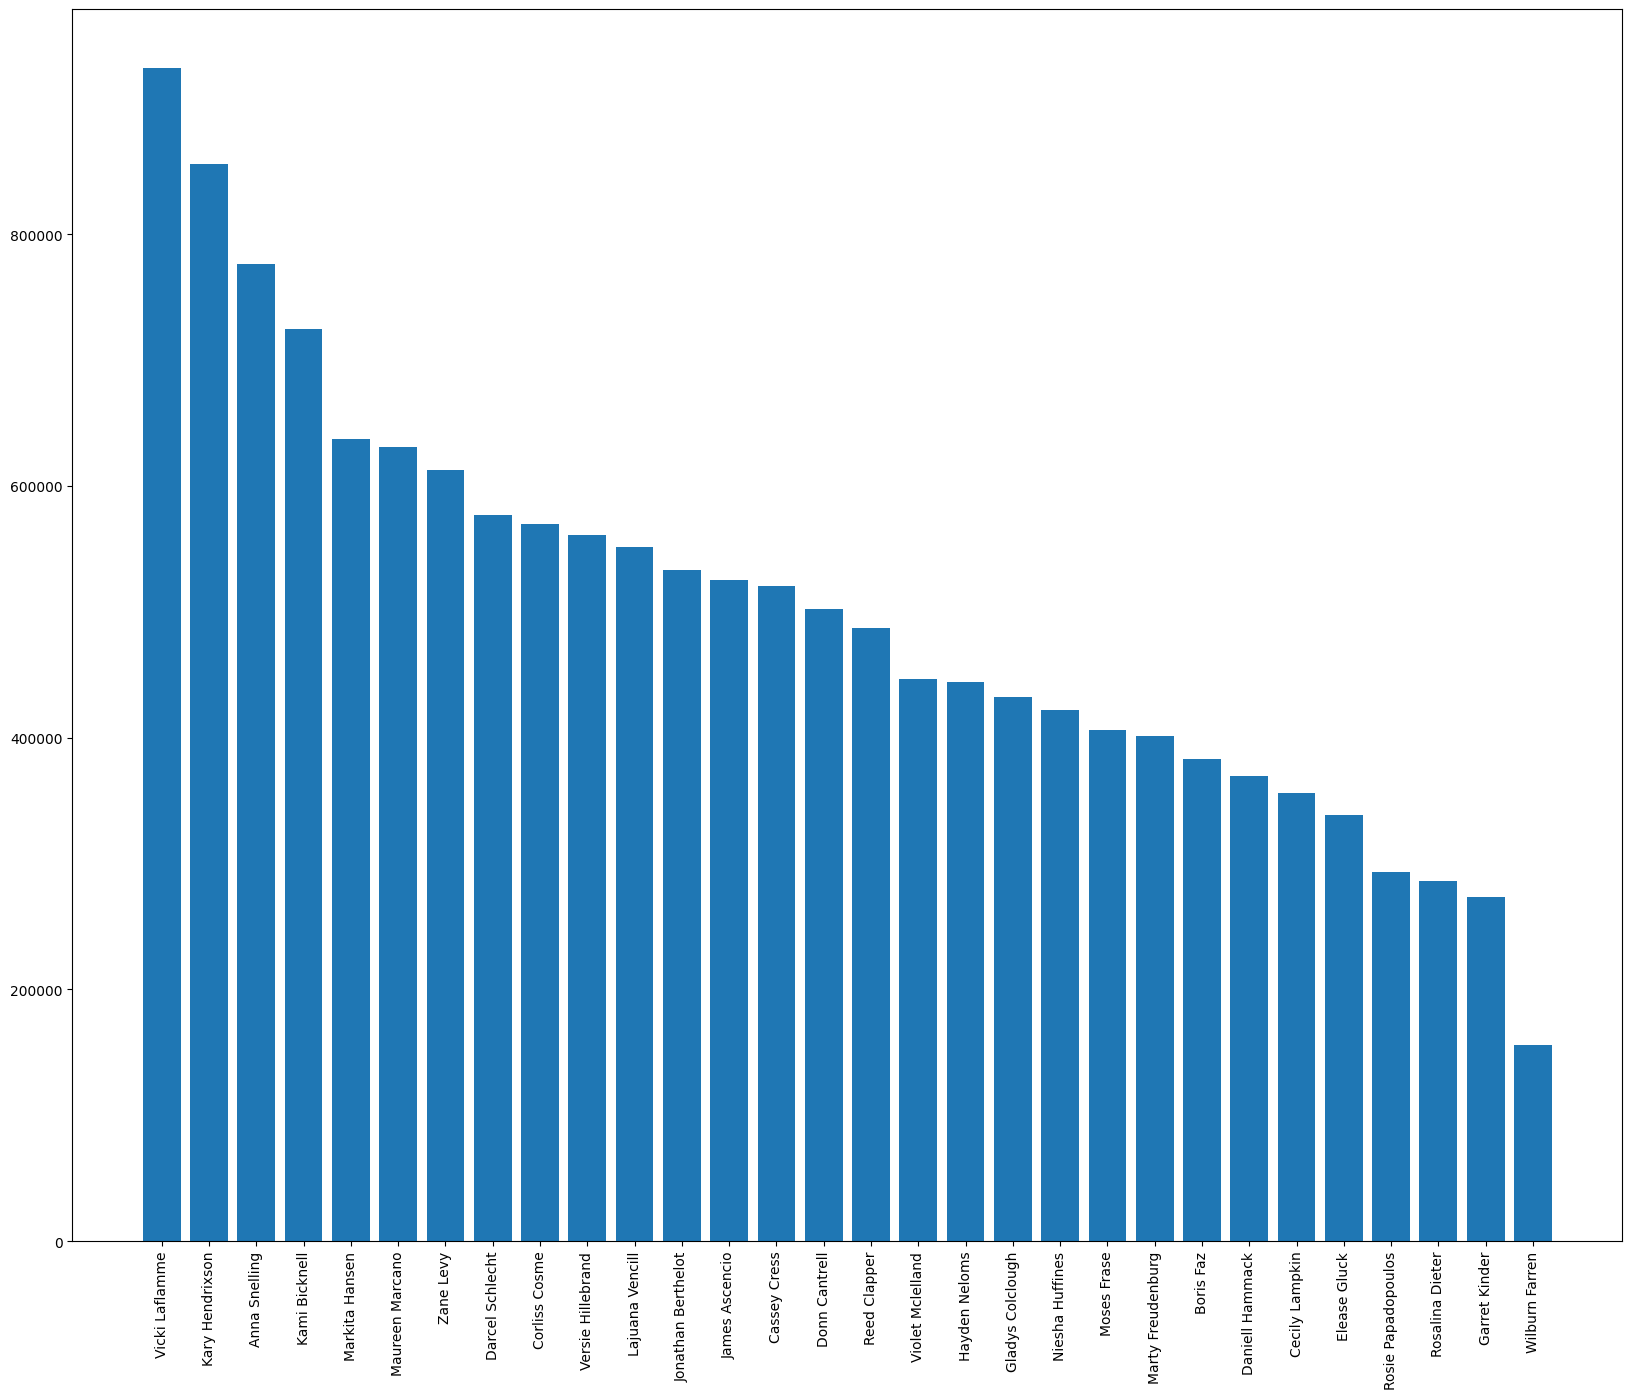

In [31]:
mp.figure(figsize=(20,16))
mp.bar(dev['sales_agent'], dev["revenue"])
mp.xticks(dev["sales_agent"], rotation=90)


<BarContainer object of 15 artists>

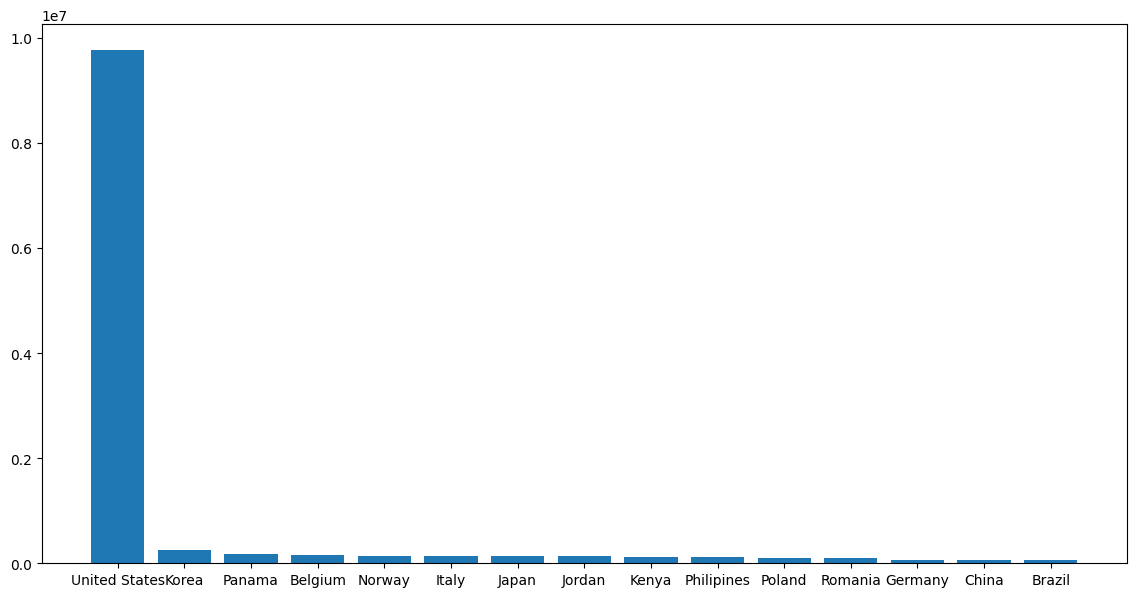

In [32]:
ok=pd.DataFrame(df.groupby("office_location")["sales_price"].sum()).reset_index().sort_values("sales_price",ascending=False)
mp.figure(figsize=(14,7))
mp.bar(ok['office_location'], ok['sales_price'])

Text(0.5, 1.0, 'sales total')

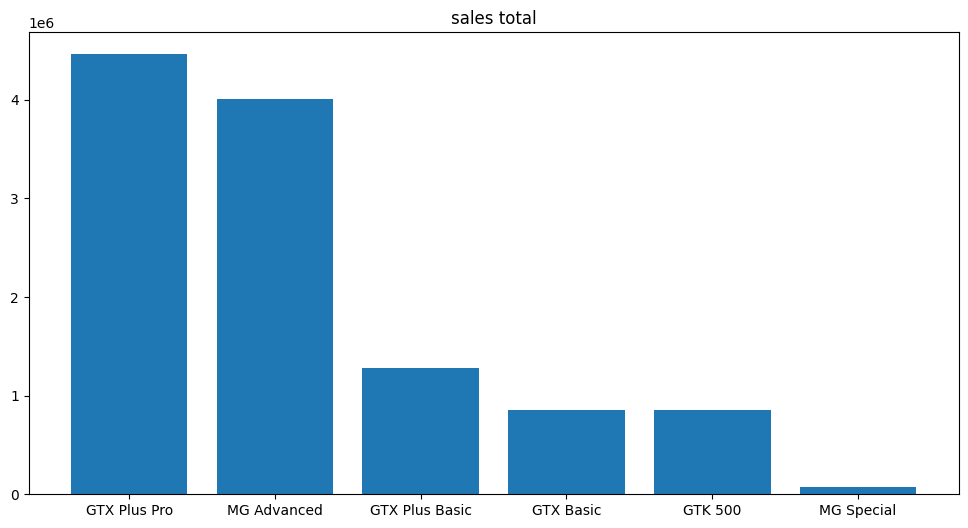

In [34]:
df3=pd.DataFrame(df.groupby("product")
["sales_price"].sum()).reset_index().sort_values("sales_price",
ascending=False)
mp.figure(figsize=(12,6))
mp.bar(df3['product'], df3['sales_price'])
mp.title("sales total")